In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
np.random.seed(666)
plt.rcParams['figure.figsize'] = (15,9)

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


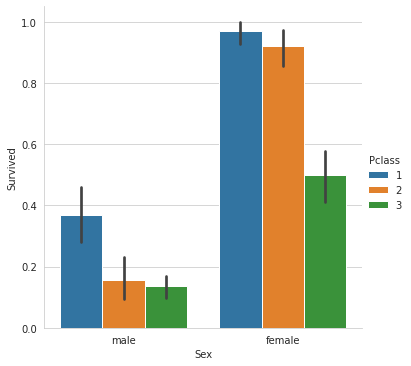

In [5]:
sns.set_style("whitegrid")
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

In [6]:
df['Pclass'].replace({1:'FirstC', 2:'SecondC', 3:'ThirdC'}, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


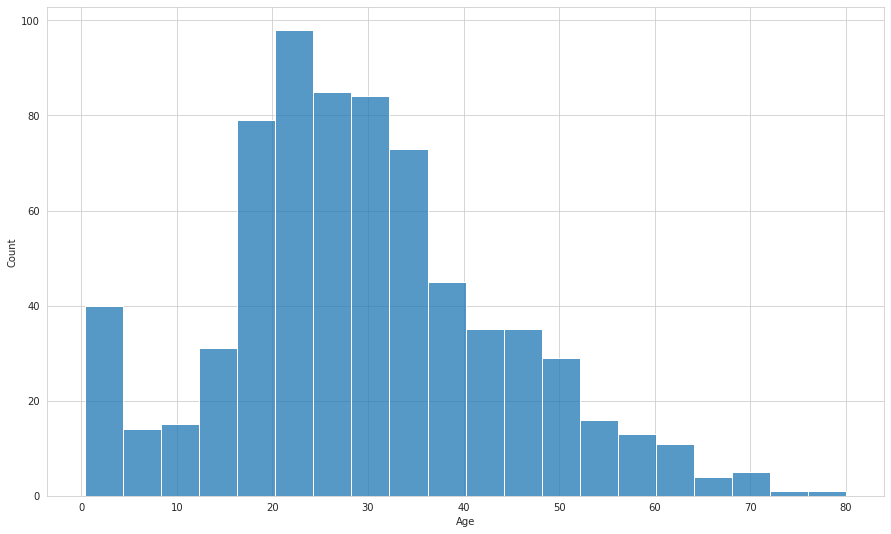

In [7]:
sns.histplot(df['Age']);

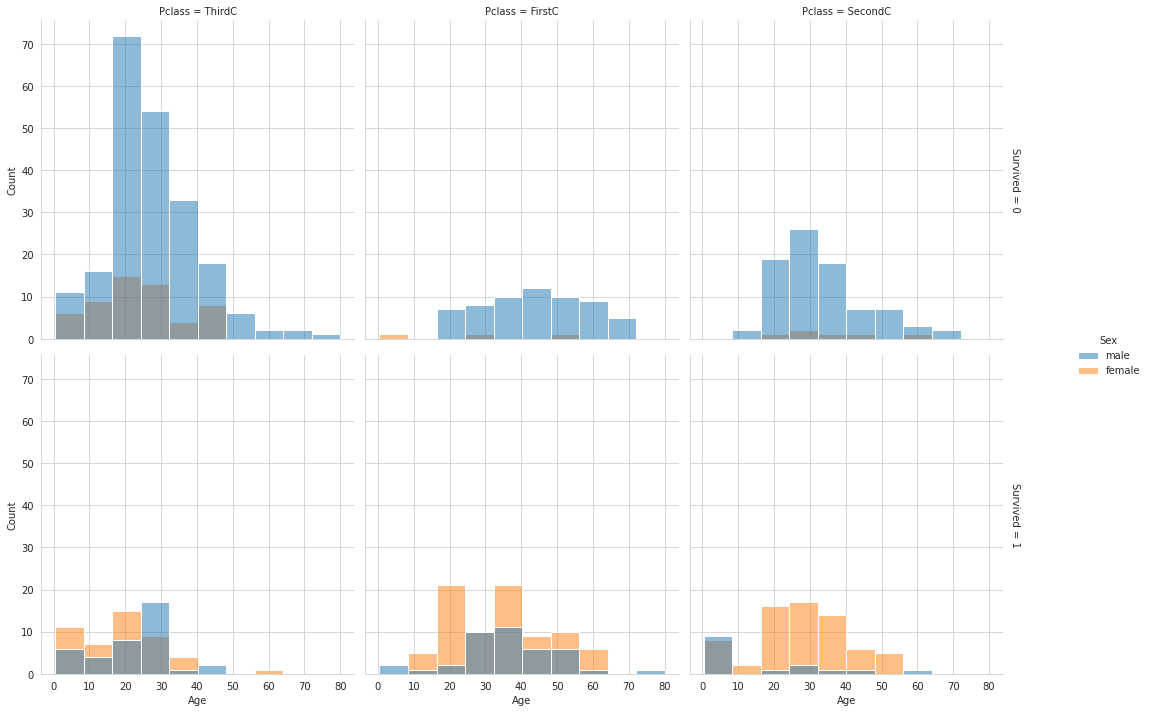

In [8]:
sns.displot(df, x='Age', hue='Sex', col='Pclass', row='Survived', facet_kws=dict(margin_titles=True), bins=10);

In [9]:
medians = df.groupby(['Pclass','Sex'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(medians)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df['ChildBin'] = df['Age'].apply(lambda x: 'Child' if x <= 18 else 'Adult')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildBin
PassengerId,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


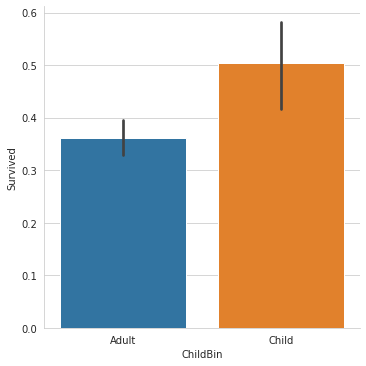

In [11]:
sns.catplot(x="ChildBin", y="Survived", kind="bar", data=df);

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace = True)

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildBin
PassengerId,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  ChildBin  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 130.5+ KB


In [15]:
min_max_scaler = MinMaxScaler()
df['FareScaled'] = min_max_scaler.fit_transform(df[['Fare']])

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildBin,FareScaled
PassengerId,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,0.014151
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,0.139136
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,0.015469
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,0.103644
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,0.015713


In [17]:
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildBin,FareScaled,Family_Size
PassengerId,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,0.014151,2
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,0.139136,2
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,0.015469,1
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,0.103644,2
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,0.015713,1


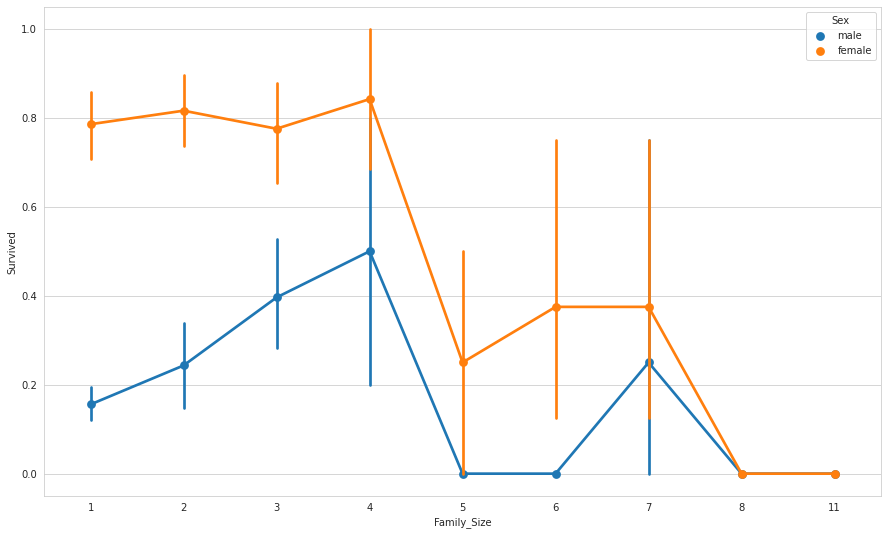

In [18]:
sns.pointplot(x="Family_Size", y="Survived", hue="Sex", data=df);

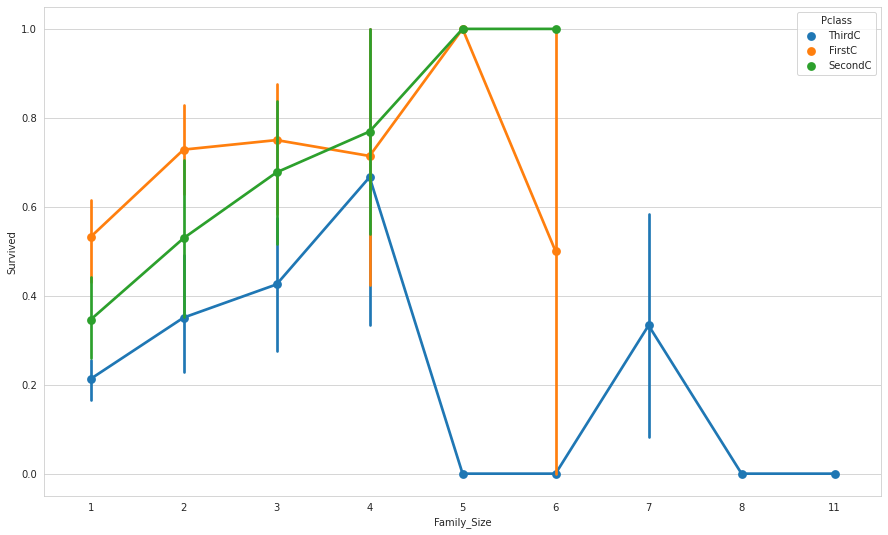

In [19]:
sns.pointplot(x="Family_Size", y="Survived", hue="Pclass", data=df);

In [20]:
df = pd.concat([df,pd.get_dummies(df['Pclass'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['ChildBin'])],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FirstC,SecondC,ThirdC,female,male,Cherbourg,Queenstown,Southampton,Adult,Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,1,0,0,1,1,0
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,1,0,1,0,0,1,0
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,1,0,0,0,1,1,0
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1,0,0,1,0,0,0,1,1,0
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,1,0,0,1,1,0


In [21]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'ChildBin', 'FareScaled', 'Family_Size',
       'FirstC', 'SecondC', 'ThirdC', 'female', 'male', 'Cherbourg',
       'Queenstown', 'Southampton', 'Adult', 'Child'],
      dtype='object')

In [22]:
df.loc[:,'FareScaled':'Child'].head()

,FareScaled,Family_Size,FirstC,SecondC,ThirdC,female,male,Cherbourg,Queenstown,Southampton,Adult,Child
PassengerId,,,,,,,,,,,,
1,0.014151,2,0,0,1,0,1,0,0,1,1,0
2,0.139136,2,1,0,0,1,0,1,0,0,1,0
3,0.015469,1,0,0,1,1,0,0,0,1,1,0
4,0.103644,2,1,0,0,1,0,0,0,1,1,0
5,0.015713,1,0,0,1,0,1,0,0,1,1,0


In [23]:
X = df.loc[:,'FareScaled':'Child']
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [24]:
interaction_features = X.columns
interaction_pipeline = Pipeline([('interaction_term', PolynomialFeatures(interaction_only=True, include_bias=False))])
feature_engineering = ColumnTransformer([('interaction_term', interaction_pipeline, interaction_features)])
feature_engineering.fit(X_train)

ColumnTransformer(transformers=[('interaction_term',
                                 Pipeline(steps=[('interaction_term',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True))]),
                                 Index(['FareScaled', 'Family_Size', 'FirstC', 'SecondC', 'ThirdC', 'female',
       'male', 'Cherbourg', 'Queenstown', 'Southampton', 'Adult', 'Child'],
      dtype='object'))])

In [25]:
X_train_fe = pd.DataFrame(feature_engineering.transform(X_train))
X_train_fe.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.113168,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015127,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.014102,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015094,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.123667,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
model = LogisticRegression(random_state=321, max_iter=5000)
model.fit(X_train_fe, y_train)

LogisticRegression(max_iter=5000, random_state=321)

In [27]:
print(f'The training accuracy of the model is {round(model.score(X_train_fe, y_train), 2)}')

The training accuracy of the model is 0.81


In [28]:
cross_val_accuracy = cross_val_score(estimator=model, X=X_train_fe, y=y_train, cv=5, scoring='accuracy')
print("cross-validation accuracy scores are", cross_val_accuracy)

cross-validation accuracy scores are [0.81818182 0.78321678 0.79577465 0.8028169  0.8028169 ]


In [29]:
print(f'The average cross validation accuracy of the model is {round(cross_val_accuracy.mean(), 2)}')

The average cross validation accuracy of the model is 0.8


In [30]:
precision = cross_val_score(model, X_train_fe, y_train, cv=5, scoring='precision')
print("cross-validation scores are", precision)

cross-validation scores are [0.875      0.79069767 0.7826087  0.84615385 0.82926829]


In [31]:
print(f'The average CV precision of the model is {round(precision.mean(), 2)}')

The average CV precision of the model is 0.82


In [32]:
recall = cross_val_score(model, X_train_fe, y_train, cv=5, scoring='recall')
print("cross-validation recall scores are", recall)

cross-validation recall scores are [0.625      0.60714286 0.65454545 0.6        0.61818182]


In [33]:
print(f'The average CV recall of the model is {round(recall.mean(), 2)}')

The average CV recall of the model is 0.62


In [34]:
X_test_fe = feature_engineering.transform(X_test)

In [35]:
print(f'The test accuracy of the model is {round(model.score(X_test_fe, y_test), 2)}')

The test accuracy of the model is 0.85
